In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

In [101]:
warnings.filterwarnings('ignore')

In [102]:
data = np.load('proyecto_training_data.npy')

In [103]:
dataFrame = pd.DataFrame(data, columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [104]:
dataFrame

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### Check for NA's

In [105]:
cols_na = [col for col in dataFrame.columns if(dataFrame[col].isnull().mean()>0)]
cols_na

['LotFrontage']

In [106]:
dataFrame[cols_na].isnull().mean()

LotFrontage    0.177397
dtype: float64

In [107]:
dataFrame['LotFrontage'] = np.round(dataFrame['LotFrontage'].fillna(dataFrame['LotFrontage'].mean()))

In [108]:
cols_na = [col for col in dataFrame.columns if(dataFrame[col].isnull().mean()>0)]
cols_na

[]

### Data split test/train


In [109]:
x_train, x_test, y_train, y_test = train_test_split(dataFrame.drop('SalePrice', axis=1), dataFrame['SalePrice'], test_size=0.2)

### Media, Max, Min, Rango y Std

In [110]:
#SalePrice
print('SalePrice')
#media
print('media',dataFrame.SalePrice.mean())
#max
print('max',dataFrame.SalePrice.max())
#min
print('min',dataFrame.SalePrice.min())
#rango
print('rango inferior',dataFrame.SalePrice.min(), 'rango superior',dataFrame.SalePrice.max())
#desviacion estandar
print('desviacion estandar',dataFrame.SalePrice.std())

SalePrice
media 180921.19589041095
max 755000.0
min 34900.0
rango inferior 34900.0 rango superior 755000.0
desviacion estandar 79442.50288288663


In [111]:
#OverallQual
print('OverallQual')
#media
print('media',dataFrame.OverallQual.mean())
#max
print('max',dataFrame.OverallQual.max())
#min
print('min',dataFrame.OverallQual.min())
#rango
print('rango inferior',dataFrame.OverallQual.min(), 'rango superior',dataFrame.OverallQual.max())
#desviacion estandar
print('desviacion estandar',dataFrame.OverallQual.std())

OverallQual
media 6.0993150684931505
max 10.0
min 1.0
rango inferior 1.0 rango superior 10.0
desviacion estandar 1.3829965467415923


In [112]:
#1stFlrSF
print('1stFlrSF')
#media
print('media',dataFrame['1stFlrSF'].mean())
#max
print('max',dataFrame['1stFlrSF'].max())
#min
print('min',dataFrame['1stFlrSF'].min())
#rango
print('rango inferior',dataFrame['1stFlrSF'].min(), 'rango superior',dataFrame['1stFlrSF'].max())
#desviacion estandar
print('desviacion estandar',dataFrame['1stFlrSF'].std())

1stFlrSF
media 1162.626712328767
max 4692.0
min 334.0
rango inferior 334.0 rango superior 4692.0
desviacion estandar 386.5877380410738


In [113]:
#TotRmsAbvGrd
print('TotRmsAbvGrd')
#media
print('media',dataFrame.TotRmsAbvGrd.mean())
#max
print('max',dataFrame.TotRmsAbvGrd.max())
#min
print('min',dataFrame.TotRmsAbvGrd.min())
#rango
print('rango inferior',dataFrame.TotRmsAbvGrd.min(), 'rango superior',dataFrame.TotRmsAbvGrd.max())
#desviacion estandar
print('desviacion estandar',dataFrame.TotRmsAbvGrd.std())

TotRmsAbvGrd
media 6.517808219178082
max 14.0
min 2.0
rango inferior 2.0 rango superior 14.0
desviacion estandar 1.625393290584064


In [114]:
#YearBuilt
print('YearBuilt')
#media
print('media',dataFrame.YearBuilt.mean())
#max
print('max',dataFrame.YearBuilt.max())
#min
print('min',dataFrame.YearBuilt.min())
#rango
print('rango inferior',dataFrame.YearBuilt.min(), 'rango superior',dataFrame.YearBuilt.max())
#desviacion estandar
print('desviacion estandar',dataFrame.YearBuilt.std())

YearBuilt
media 1971.267808219178
max 2010.0
min 1872.0
rango inferior 1872.0 rango superior 2010.0
desviacion estandar 30.202904042525265


In [115]:
#LotFrontage
print('LotFrontage')
#media
print('media',dataFrame.LotFrontage.mean())
#max
print('max',dataFrame.LotFrontage.max())
#min
print('min',dataFrame.LotFrontage.min())
#rango
print('rango inferior',dataFrame.LotFrontage.min(), 'rango superior',dataFrame.LotFrontage.max())
#desviacion estandar
print('desviacion estandar',dataFrame.LotFrontage.std())

LotFrontage
media 70.04109589041096
max 313.0
min 21.0
rango inferior 21.0 rango superior 313.0
desviacion estandar 22.024030962875983


### Histogramas

In [116]:
def snsPlotVsSalesPrice(dataset, col):
    plt.subplots(figsize=(18,6))
    sns.histplot(x=dataset[col], kde=True)
    plt.xticks(rotation=90)

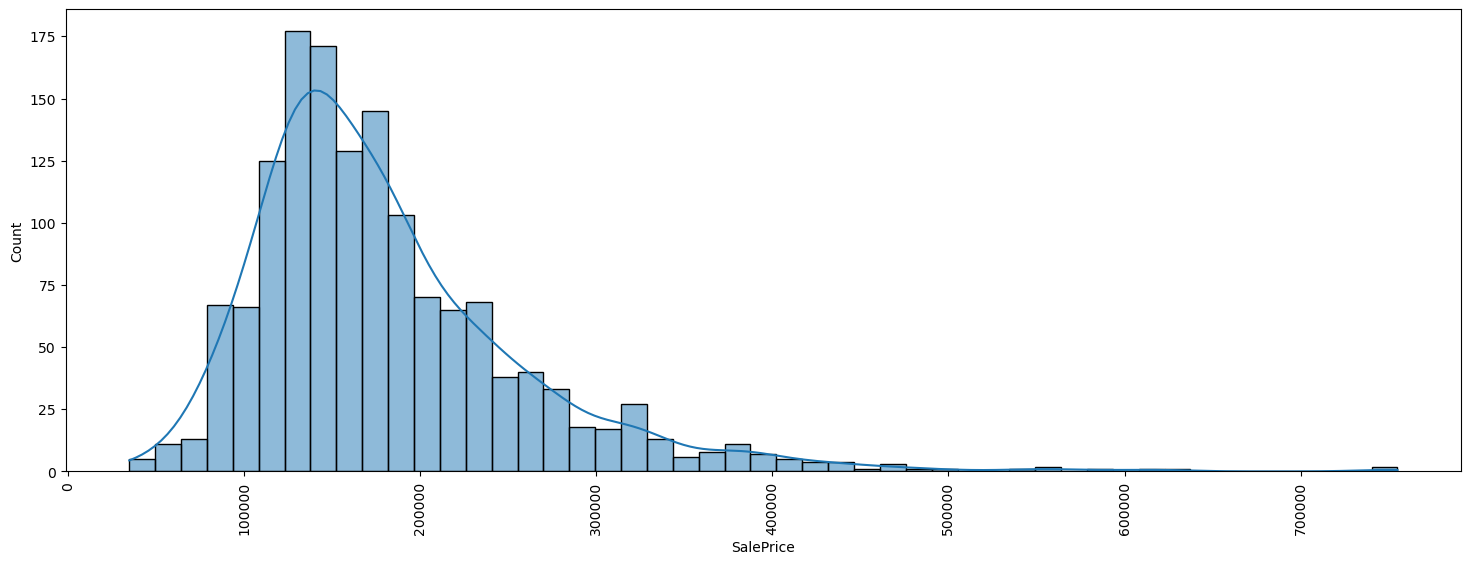

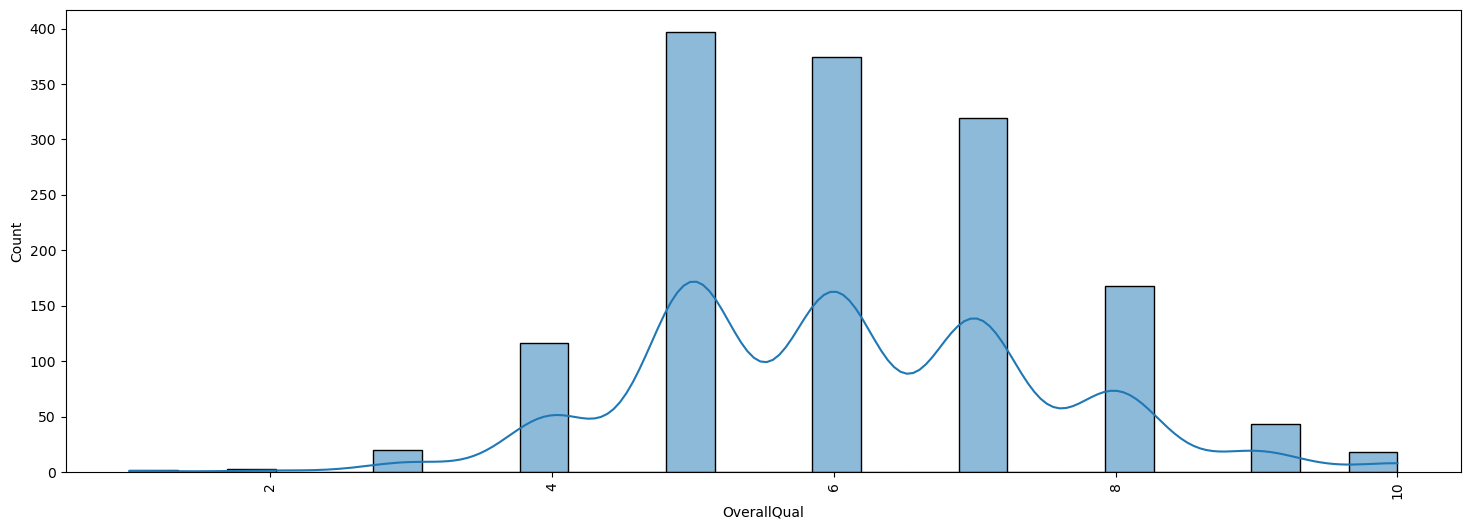

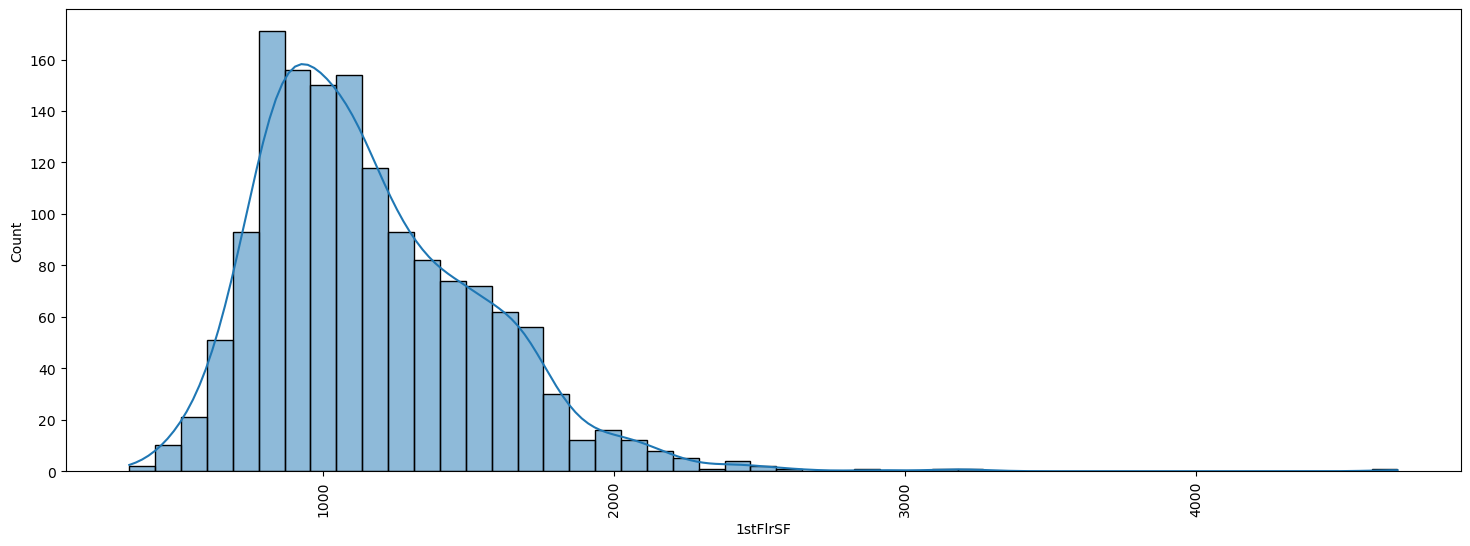

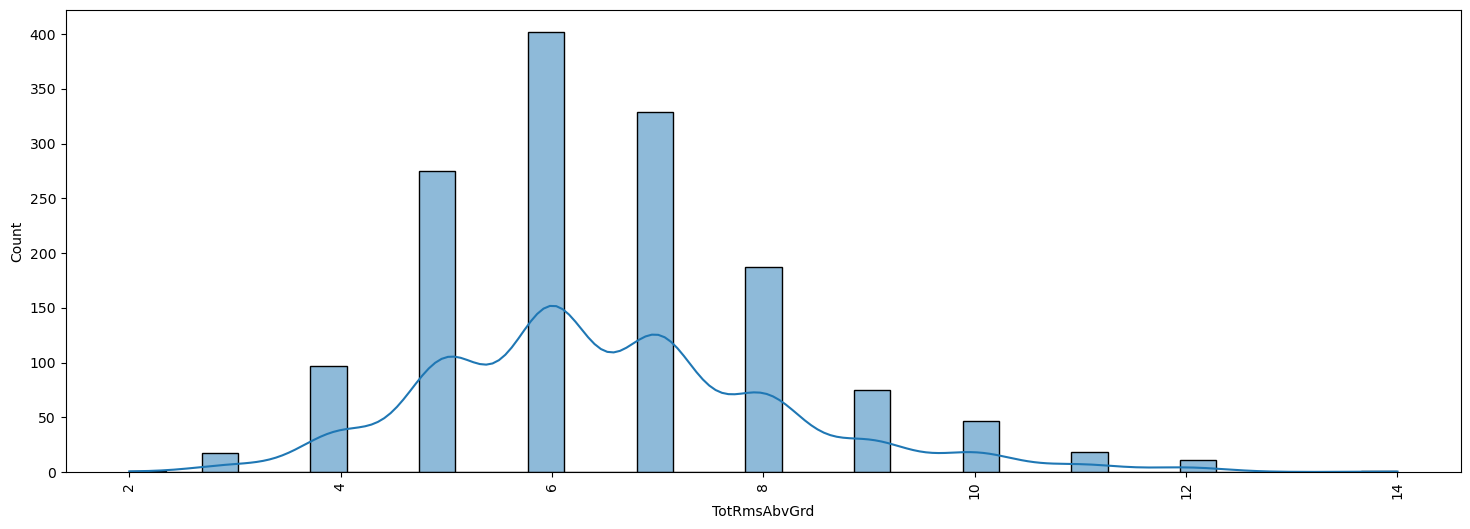

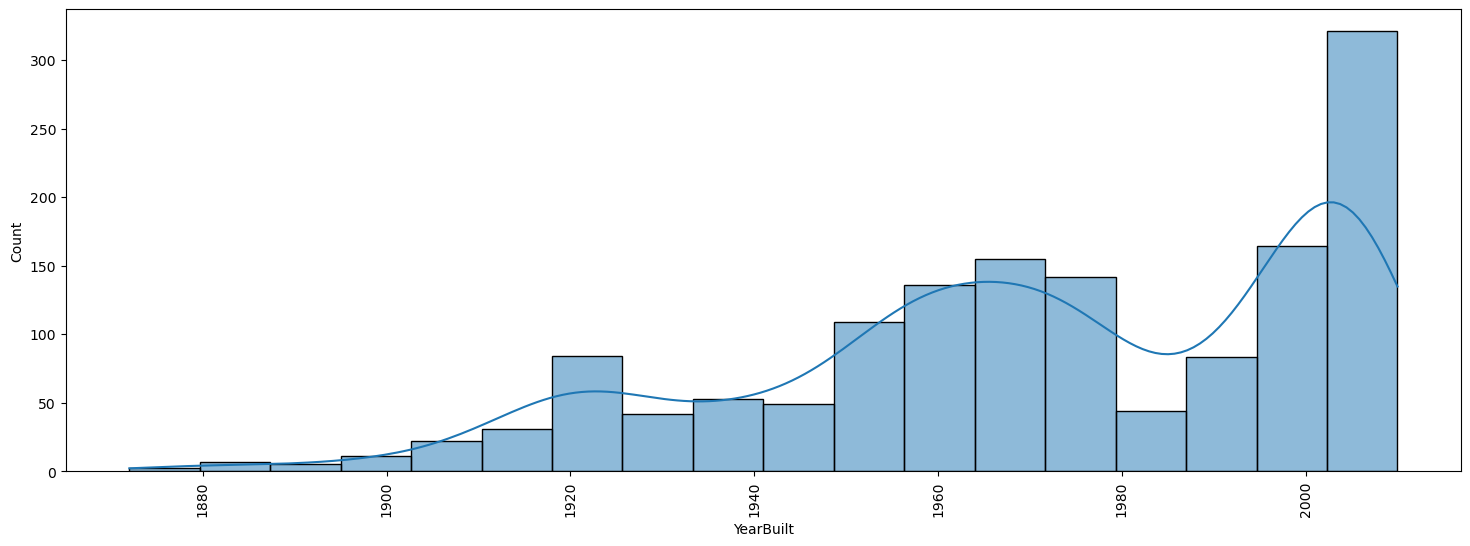

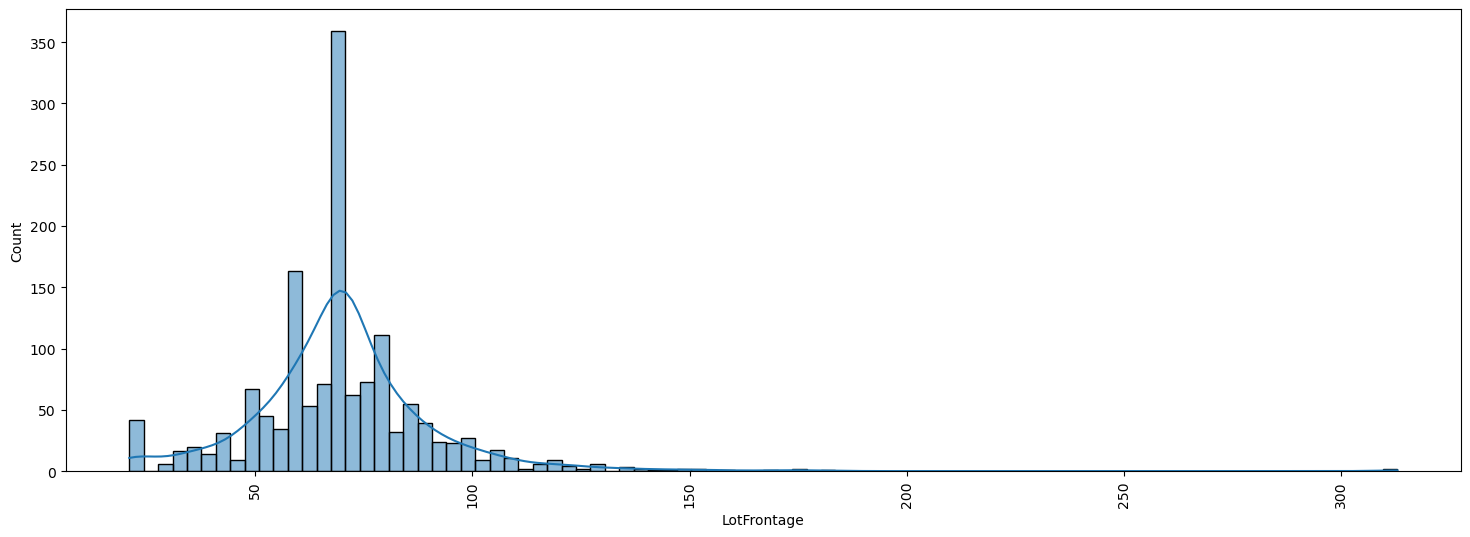

In [117]:
for col in dataFrame.columns:
    snsPlotVsSalesPrice(dataFrame, col)

### Analisis de variables independientes X

In [118]:
def correlacion(x,y):
    return(round(x.corr(y),2))

In [119]:
def scatter_plot(x,y):
    corr = correlacion(x,y)
    plt.subplots(figsize=(18,6))
    plt.scatter(x,y)
    #title_name = 'Correlacion entre',y.name,'Vs', x.name,corr
    plt.title(corr)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show

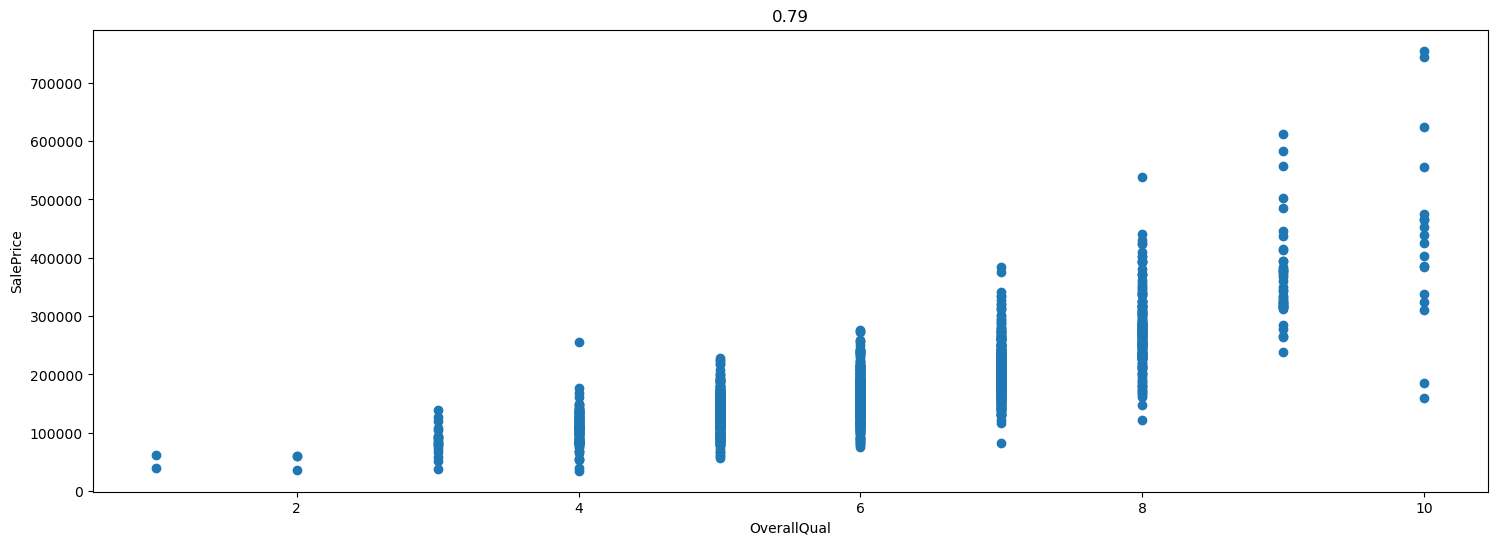

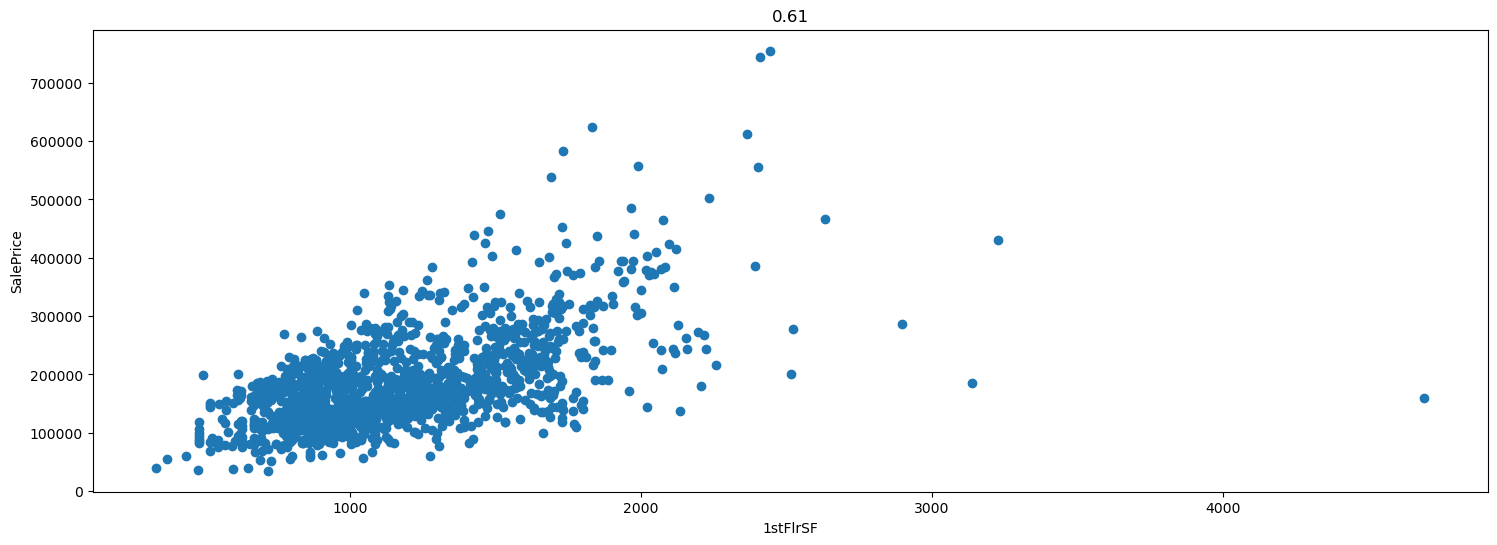

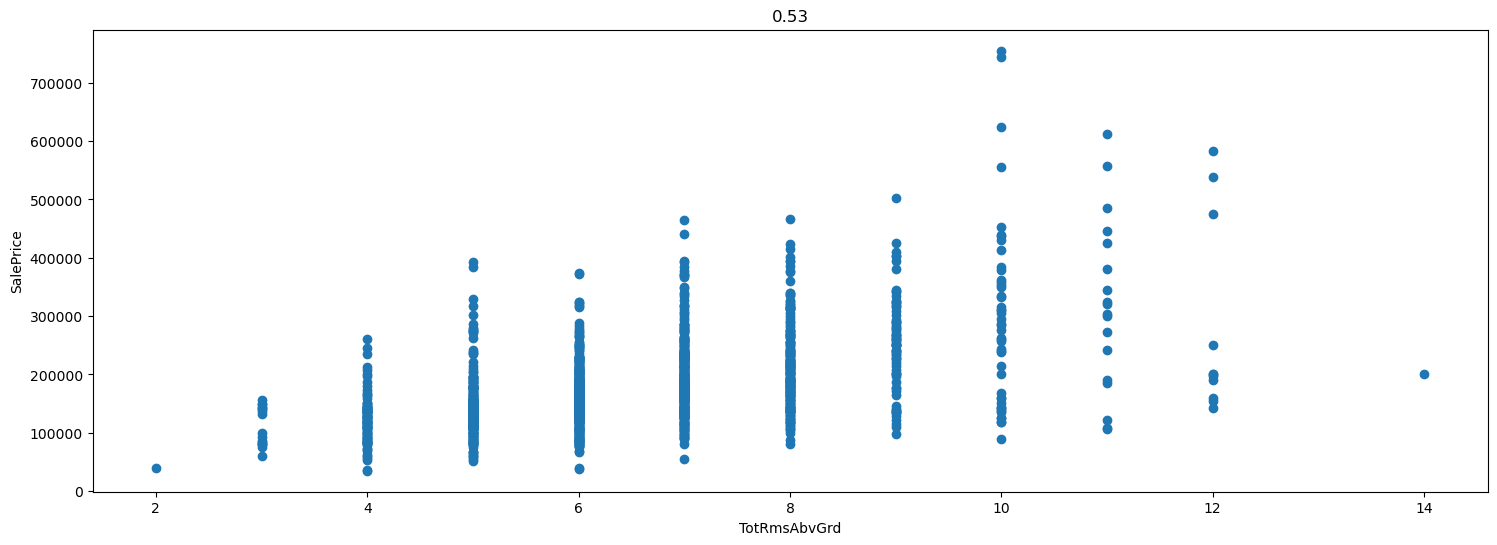

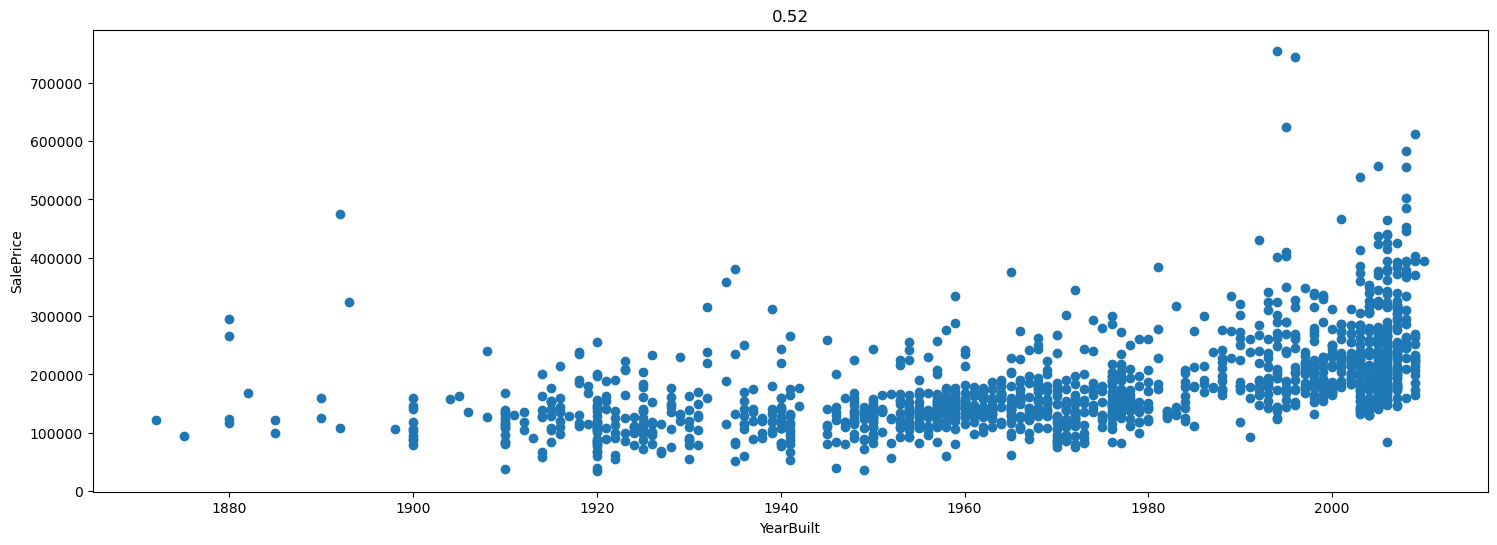

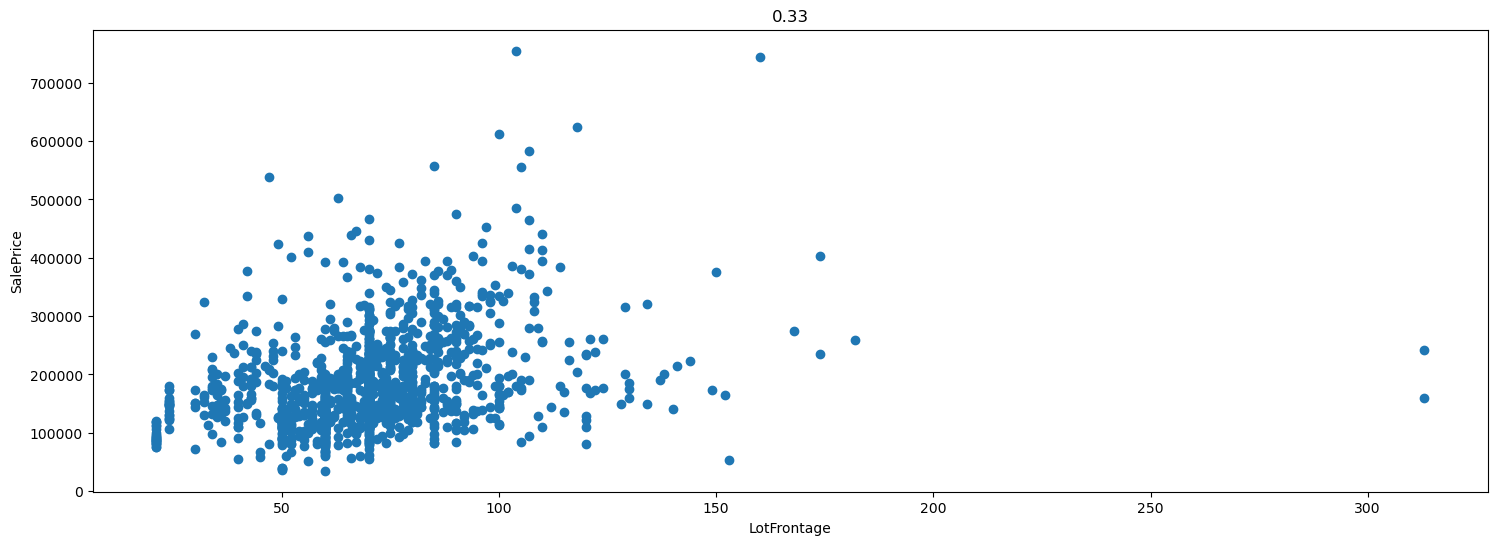

In [120]:
for col in dataFrame.columns:
    if col == 'SalePrice':
        continue
    scatter_plot(dataFrame[col], dataFrame['SalePrice'])

### Funciones

In [121]:
def betas(x, y):
    y_col = y
    x_col = x

    y_sum = y_col.sum()
    x_sum = x_col.sum()

    x_pow = x_col**2
    x_pow_sum = x_pow.sum()
    x_sum_pow = x_sum**2

    x_y_mult = y_col * x_col
    x_y_mult_sum = x_y_mult.sum()

    n = len(y_col)

    denominator = (n*x_pow_sum - x_sum_pow)
    b0_num = (x_pow_sum*y_sum - x_sum*x_y_mult_sum)
    b1_num = (n*x_y_mult_sum - x_sum*y_sum)

    b0 = b0_num/denominator
    b1 = b1_num/denominator

    return(b0, b1)

In [122]:
def error(y, y_prima):
    n = len(y)
    delta_y_pow = ((y-y_prima)**2).sum()
    err = delta_y_pow/(2*n)
    return(err)

In [123]:
def gradiente(x, y, y_prima):
    n = len(y)
    delta_y_por_x = ((y_prima-y)*x).sum()
    delta_y = (y_prima-y).sum()

    gradiente_b1 = delta_y_por_x/n
    gradiente_b0 = delta_y/n
    #print(gradiente_b0,gradiente_b1)
    return(gradiente_b0, gradiente_b1)


In [124]:
def betas_actualizados(b0, b1, learning_rate, gradiente_b0, gradiente_b1):
    new_b0 = b0 - learning_rate*(gradiente_b0)
    new_b1 = b1 - learning_rate*(gradiente_b1)
    return(new_b0, new_b1)

In [125]:
def modelo (x, y, epochs, imprimir_error_cada, learning_rate):

    resultados = pd.DataFrame(columns=['Iteracion', 'b0', 'b1'])
    errores = {}
    res_y = pd.DataFrame()

    matrix_ones = pd.DataFrame([x]).T
    matrix_ones['ones'] = 1
    b0 = 0
    b1 = 0
    i=0
    j=1

    while i < epochs:

        y_prima = x*b1 + b0
        matrix_ones['ones'] = matrix_ones['ones']*y_prima

        err = error(y, y_prima)

        if j == imprimir_error_cada:
            print(err)
            j=0

        grad_0, grad_1 = gradiente(x, y, y_prima)
        resultados.loc[len(resultados)] = [i,b0,b1]
        b0, b1 = betas_actualizados(b0, b1, learning_rate, grad_0, grad_1)
        errores[i] = err
        res_y[i] = y_prima

        i+=1
        j+=1

    return(resultados, errores, res_y)

In [126]:
def error_plot(keys, vals):
    plt.subplots(figsize=(18,6))
    plt.plot(keys, vals)
    plt.show()

In [179]:
def evolucion_modelo(x, y, res, n):
    plt.subplots(figsize=(18,6))
    plt.plot(x,y,'o')
    i = n
    plt.plot(x,(res['b0'][0] + res['b1'][0]*x), label='0')
    while i <= len(res):
        #print(res['b0'][i-1], res['b1'][i-1])
        plt.plot(x,(res['b0'][i-1] + res['b1'][i-1]*x), label=i-1)
        i+=n
        plt.legend(loc='upper left')
    plt.show()

### model test

In [200]:
res, err, res_y = modelo(x_train['OverallQual'], y_train, 50000, 5000, 0.001)

1345504610.727782
1284136992.9764807
1245991513.0055063
1222280675.0174203
1207542262.0121284
1198381016.0863745
1192686479.8508923
1189146814.7005377
1186946595.2518384
1185578961.4738371


In [201]:
res

,Iteracion,b0,b1
0,0.0,0.000000,0.000000
1,1.0,180.413398,1183.113598
2,2.0,353.457550,2319.213397
3,3.0,519.425489,3410.168818
4,4.0,678.598598,4457.774945
...,...,...,...
49995,49995.0,-89224.082139,44451.178571
49996,49996.0,-89224.538849,44451.250161
49997,49997.0,-89224.995537,44451.321748
49998,49998.0,-89225.452204,44451.393331


In [202]:
res_y

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
478,0.0,9645.322179,18907.164725,27800.776029,36340.798157,44541.290957,52415.755215,59977.154878,67237.938409,74210.059276,...,266384.766295,266384.882333,266384.998365,266385.114392,266385.230413,266385.346428,266385.462438,266385.578443,266385.694442,266385.810435
874,0.0,6095.981386,11949.524534,17570.269577,22967.473322,28150.024500,33126.458394,37904.970897,42493.432007,46899.398785,...,133032.304586,133032.205802,133032.107024,133032.008250,133031.909480,133031.810716,133031.711956,133031.613200,133031.514450,133031.415704
819,0.0,8462.208581,16587.951328,24390.607212,31883.023212,39077.535472,45985.989608,52619.760218,58989.769608,65106.505779,...,221933.945725,221933.990156,221934.034585,221934.079011,221934.123435,221934.167857,221934.212277,221934.256695,221934.301111,221934.345525
55,0.0,7279.094984,14268.737931,20980.438394,27425.248267,33613.779986,39556.224001,45262.365557,50741.600807,56002.952282,...,177483.125156,177483.097979,177483.070804,177483.043630,177483.016458,177482.989286,177482.962116,177482.934948,177482.907780,177482.880614
672,0.0,7279.094984,14268.737931,20980.438394,27425.248267,33613.779986,39556.224001,45262.365557,50741.600807,56002.952282,...,177483.125156,177483.097979,177483.070804,177483.043630,177483.016458,177482.989286,177482.962116,177482.934948,177482.907780,177482.880614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,0.0,8462.208581,16587.951328,24390.607212,31883.023212,39077.535472,45985.989608,52619.760218,58989.769608,65106.505779,...,221933.945725,221933.990156,221934.034585,221934.079011,221934.123435,221934.167857,221934.212277,221934.256695,221934.301111,221934.345525
520,0.0,4912.867789,9630.311137,14160.100759,18509.698378,22686.269015,26696.692787,30547.576236,34245.263206,37795.845289,...,88581.484016,88581.313626,88581.143243,88580.972869,88580.802503,88580.632145,88580.461795,88580.291453,88580.121119,88579.950793
43,0.0,6095.981386,11949.524534,17570.269577,22967.473322,28150.024500,33126.458394,37904.970897,42493.432007,46899.398785,...,133032.304586,133032.205802,133032.107024,133032.008250,133031.909480,133031.810716,133031.711956,133031.613200,133031.514450,133031.415704
1370,0.0,4912.867789,9630.311137,14160.100759,18509.698378,22686.269015,26696.692787,30547.576236,34245.263206,37795.845289,...,88581.484016,88581.313626,88581.143243,88580.972869,88580.802503,88580.632145,88580.461795,88580.291453,88580.121119,88579.950793


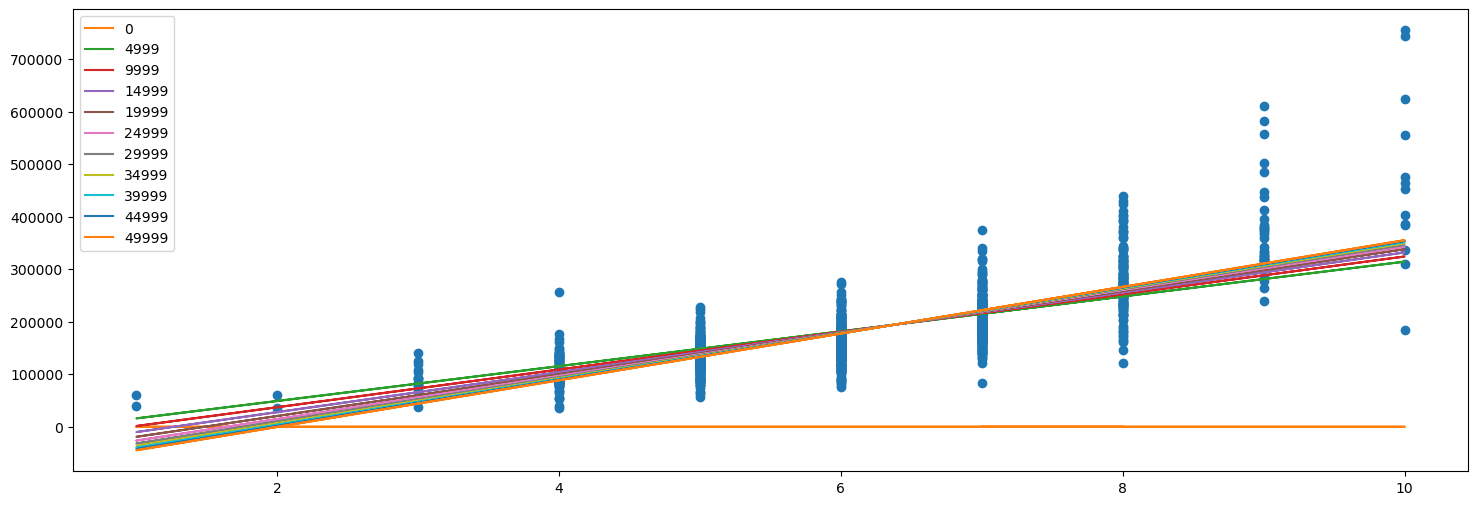

In [203]:
evolucion_modelo(x_train['OverallQual'], y_train, res,5000)

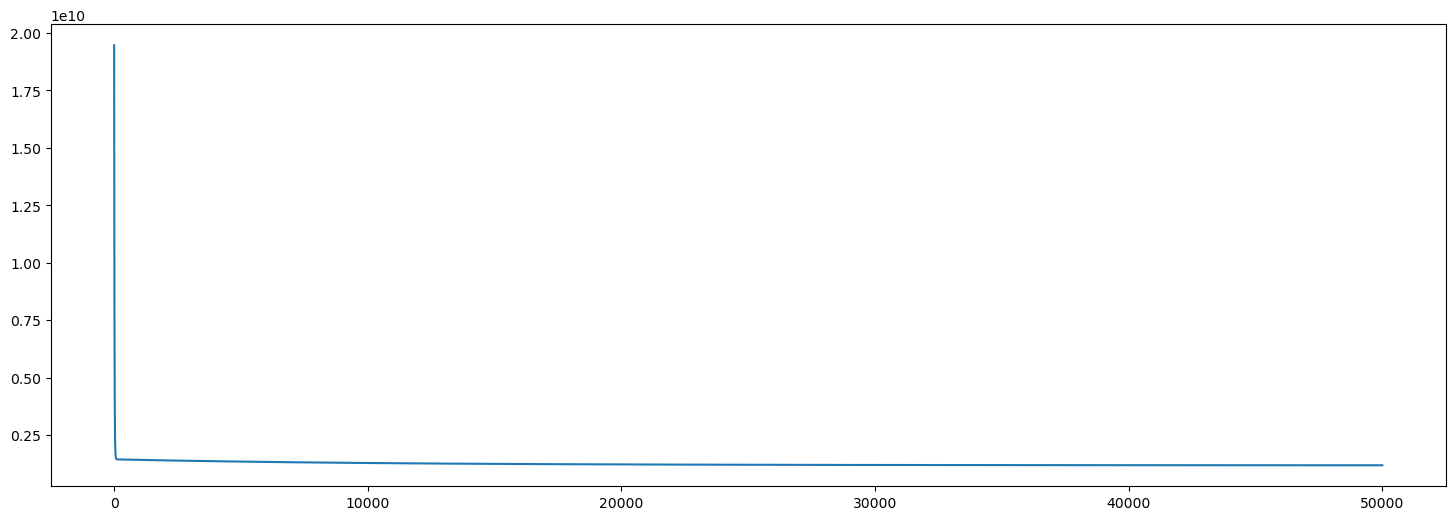

In [205]:
error_plot(err.keys(), err.values())

### SKlearn model

In [206]:
def sk_model(x_train, y_train, x_test, y_test):
    x_train = np.array(x_train).reshape(-1,1)
    y_train = np.array(y_train).reshape(-1,1)
    x_test = np.array(x_test).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)

    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return(pred, model.coef_, model.intercept_)


In [208]:
pred, model_b1, model_b0 = sk_model(x_train['OverallQual'], y_train, x_train['OverallQual'], y_test)

In [209]:
model_b0

array([-98829.65375491])

In [210]:
model_b1

array([[45956.86692768]])

### estimacion promedio

In [211]:
def estimacion_promedio(x_train, y_train, res_y):
    pred, b0, b1 = sk_model(x_train, y_train, x_train, y_test)
    promedio = (np.array(pred).reshape(-1) + np.array(res_y[len(res_y.columns)-1]).reshape(-1))/2
    cols = {'Promedio': promedio, 'My modelo':np.array(res_y[len(res_y.columns)-1]), 'SK learn': np.array(pred).reshape(-1), 'Valor real': y_train,}
    promedio_df = pd.DataFrame(data=cols)
    return(promedio_df)

In [212]:
estimacion_promedio(x_train['OverallQual'], y_train, res_y)

,Promedio,My modelo,SK learn,Valor real
478,267605.546051,266385.810435,268825.281667,297000.0
874,131993.048294,133031.415704,130954.680883,66500.0
819,222401.380132,221934.345525,222868.414739,224000.0
55,177197.214213,177482.880614,176911.547811,180500.0
672,177197.214213,177482.880614,176911.547811,165000.0
...,...,...,...,...
1322,222401.380132,221934.345525,222868.414739,190000.0
520,86788.882375,88579.950793,84997.813956,106250.0
43,131993.048294,133031.415704,130954.680883,130250.0
1370,86788.882375,88579.950793,84997.813956,105000.0


### Estimaciones

In [213]:
pred, model_b1, model_b0 = sk_model(x_train['OverallQual'], y_train, x_test['OverallQual'], y_test)

In [214]:
pred_my_model = x_test['OverallQual']*res['b1'][len(res)-1] + res['b0'][len(res)-1]

In [216]:
pd.DataFrame({'SK-learn':np.array(pred).reshape(-1), 'My modelo':np.array(pred_my_model).reshape(-1), 'Valor real':np.array(y_test).reshape(-1)})

,SK-learn,My modelo,Valor real
0,314782.148594,310837.275346,377500.0
1,222868.414739,221934.345525,237000.0
2,268825.281667,266385.810435,276000.0
3,39040.947028,44128.485883,95000.0
4,130954.680883,133031.415704,142125.0
...,...,...,...
287,222868.414739,221934.345525,184000.0
288,222868.414739,221934.345525,116900.0
289,222868.414739,221934.345525,191000.0
290,222868.414739,221934.345525,187500.0
